In [1]:
import os
import pandas as pd

In [3]:
def  symbol_to_path(symbol,base_dir='/home/machine_learning/anaconda3/ml4trading/data/'):
    """returns  CSV  file path given symbol"""
    return os.path.join(base_dir,"{}.csv".format(str(symbol)))

In [7]:
symbol_to_path('IBM')

'/home/machine_learning/anaconda3/ml4trading/data/IBM.csv'

In [93]:
def get_data(symbols,dates):
    """Reads stock  data( adjusted  close ) for  given symbols  from  csv  files   and returns  entire  df"""
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols :
        symbols.insert(0,'SPY')
    for symbol in symbols :
        #read and join data  for  each  symbol 
        df_temp=pd.read_csv(symbol_to_path(symbol),index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp,how="inner")
    return  df
        

In [94]:
#define  date range
dates=pd.date_range('2010-01-22','2010-01-26')

In [95]:
#define symbols :
symbols = ['GOOG', 'IBM', 'GLD']

In [96]:
s=get_data(symbols,dates)
s

,SPY,GOOG,IBM,GLD
2010-01-26,104.43,542.42,119.85,107.56
2010-01-25,104.87,540.00,120.20,107.48
2010-01-22,104.34,550.01,119.61,107.17


In [97]:
#slicing  when more   data :
dates=pd.date_range('2010-01-01','2010-12-31')

In [98]:
#get  stock  data 
s=get_data(symbols,dates)
 

In [99]:
# slice  by row  range   dates  using DataFrame.ix[] selector

In [116]:

s.ix[pd.date_range('2010-03-10','2010-03-15'),['IBM','SPY']].dropna()

,IBM,SPY
2010-03-10,120.26,109.84
2010-03-11,122.16,110.30
2010-03-12,122.48,110.31
2010-03-15,122.38,110.34


In [122]:
s=s/s.ix[0]#normalization

In [124]:
s.head(3)

,SPY,GOOG,IBM,GLD
2010-12-31,1.000000,1.000000,1.000000,1.000000
2010-12-30,0.999754,1.008233,0.999369,0.987817
2010-12-29,1.001311,1.011836,0.998387,0.992719


In [151]:
import  matplotlib 
from matplotlib  import pyplot  as plt
 

In [152]:
def plot_data(df,title="Stock prices"):
    ax=df.plot(title=title, fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

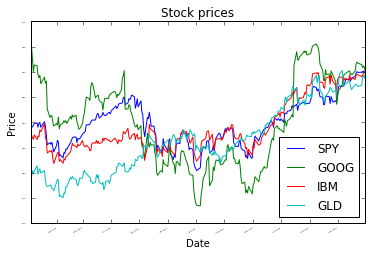

In [153]:
plot_data(s)

In [154]:
def plot_selected(df, columns,  start_index,end_index):
    subseted=df.ix[pd.date_range(start_index,end_index),columns].dropna()
    plot_data(subseted)

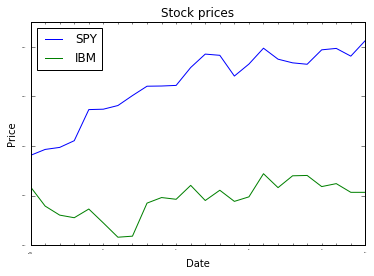

In [155]:
plot_selected(s,['SPY','IBM'],'2010-03-01', '2010-04-01')